In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Results/Total_score.csv", index_col=0)
df.head()

,Full Text,Generated Text,Actual Text,Finetune,Category,Rouge-1,Rouge-2,Rouge-l
0,Peugeot deal boosts Mitsubishi Struggling Japa...,Japanese car maker Mitsubishi Motors has struc...,Struggling Japanese car maker Mitsubishi Motor...,business,business,0.638037,0.567568,0.638037
1,Japan bank shares up on link talk Shares of Su...,"SMFG shares climbed by 2.7% to 717,000, and Da...","Shares of Sumitomo Mitsui Financial (SMFG), an...",business,business,0.608108,0.438202,0.594595
2,Ebbers 'aware' of WorldCom fraud Former WorldC...,"Mr Ebbers has denied all the charges, saying h...",Mr Sullivan is at the centre of the government...,business,business,0.589041,0.510000,0.575342
3,Barclays shares up on merger talk Shares in UK...,Shares in UK banking group Barclays have risen...,Shares in UK banking group Barclays have risen...,business,business,0.715152,0.691244,0.715152
4,French boss to leave EADS The French co-head o...,The company should now be able put this disput...,The company should now be able put this disput...,business,business,0.907895,0.874419,0.907895


In [3]:
score = 'Rouge-1'
df_mean = df.groupby(['Finetune', 'Category']).agg({score: ['mean']})
df_mean = df_mean.pivot_table(score, ['Finetune'], 'Category')
df_mean = df_mean.droplevel(0, axis=1)
df_mean

Category,Mixed,business,entertainment,politics,sport,tech
Finetune,,,,,,
Mixed,0.677182,0.702605,0.714973,0.624647,0.668068,0.682917
business,0.647325,0.673655,0.684266,0.635287,0.654491,0.621763
entertainment,0.651293,0.669563,0.723377,0.603193,0.666090,0.614811
politics,0.674325,0.723669,0.672613,0.671649,0.656425,0.637836
sport,0.679725,0.678988,0.689814,0.588787,0.683576,0.621982
tech,0.659872,0.667245,0.696792,0.597469,0.673221,0.752146


In [4]:
df_mean.style.background_gradient(cmap ='coolwarm')\
        .set_properties(**{'font-size': '20px'})

Category,Mixed,business,entertainment,politics,sport,tech
Finetune,,,,,,
Mixed,0.677182,0.702605,0.714973,0.624647,0.668068,0.682917
business,0.647325,0.673655,0.684266,0.635287,0.654491,0.621763
entertainment,0.651293,0.669563,0.723377,0.603193,0.666090,0.614811
politics,0.674325,0.723669,0.672613,0.671649,0.656425,0.637836
sport,0.679725,0.678988,0.689814,0.588787,0.683576,0.621982
tech,0.659872,0.667245,0.696792,0.597469,0.673221,0.752146


In [6]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


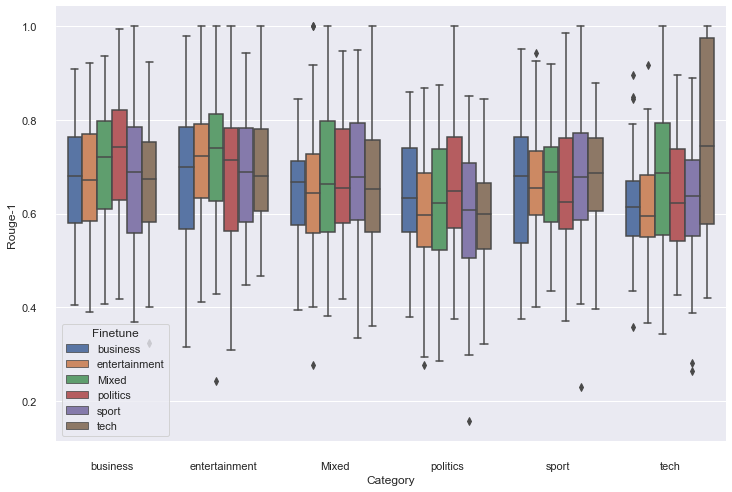

In [15]:
# Draw a nested boxplot to show bills by day and time
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x="Category", y="Rouge-1",
            hue="Finetune",
            data=df)
sns.despine(offset=10, trim=True)